In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [46]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [48]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


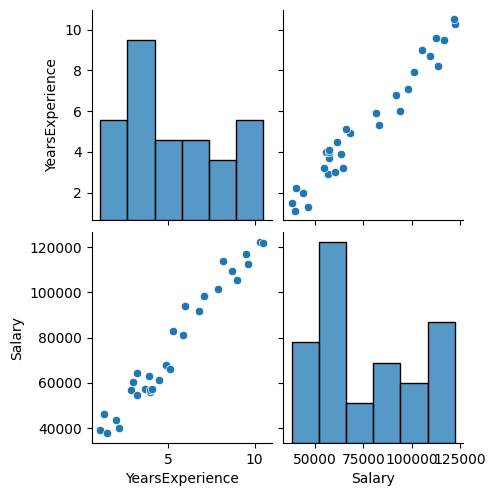

In [49]:
sns.pairplot(data) # to know we can do it linear or no

In [50]:
x = data['YearsExperience']
y = data['Salary']

# data.iloc[:, :-1]
# data.iloc[:, 1]

In [51]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [52]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [54]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [55]:
model.score(x_train.values.reshape(-1, 1), y_train)

0.9573037769139975

In [56]:
model.score(x_test.values.reshape(-1, 1), y_test)

0.9520702017424296

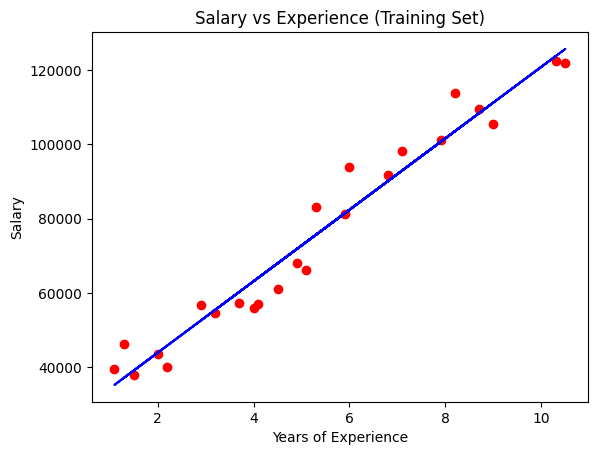

In [57]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train.values.reshape(-1, 1)), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

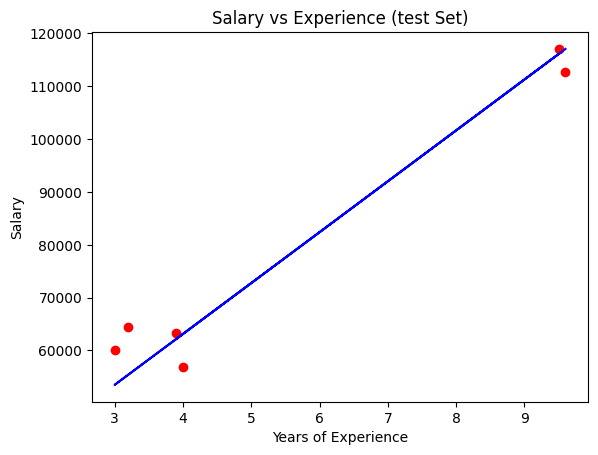

In [58]:
y_pred = model.predict(x_test.values.reshape(-1, 1))
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

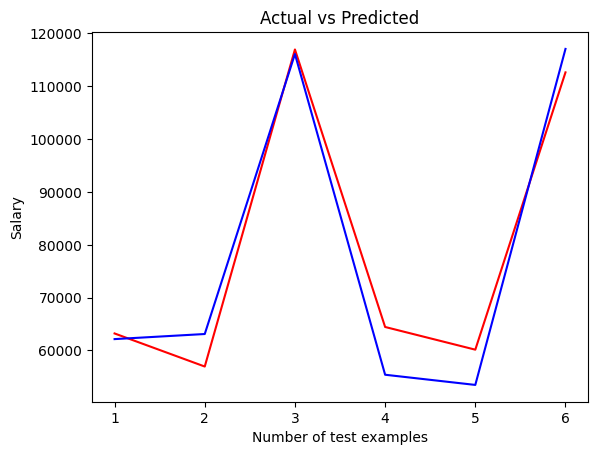

In [59]:
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color = 'red', linestyle = '-')
plt.plot(c, y_pred, color = 'blue', linestyle = '-')
plt.title('Actual vs Predicted')
plt.xlabel('Number of test examples')
plt.ylabel('Salary')
plt.show()

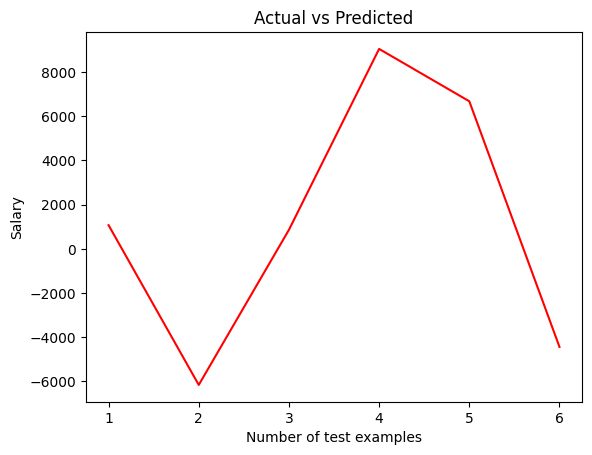

In [60]:
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test - y_pred, color = 'red', linestyle = '-')
plt.title('Actual vs Predicted')
plt.xlabel('Number of test examples')
plt.ylabel('Salary')
plt.show()

In [61]:
mse  = mean_squared_error(y_test, y_pred)
mse

30955226.717302386

In [62]:
rsq = r2_score(y_test, y_pred)
rsq

0.9520702017424296

In [64]:
print('intercept = ', model.intercept_)
print('slope = ', model.coef_)

intercept =  24570.087069722795
slope =  [9635.76791067]


In [69]:
y_hat = model.predict([[2.2]])
y_hat

array([45768.7764732])